In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
%matplotlib inline

In [2]:
datetime.date.today().strftime("%d.%m.%Y")

'15.05.2020'

In [3]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
world_confirmed_raw = pd.read_csv(url + "time_series_covid19_confirmed_global.csv")
world_confirmed_raw.to_csv('time_series_covid19_confirmed_global_'+datetime.date.today().strftime("%d.%m.%Y")+'.csv') 
   # сохраним локально
world_confirmed_raw['Province/State'].fillna('', inplace=True)
world_deaths_raw = pd.read_csv(url + "time_series_covid19_deaths_global.csv")
world_deaths_raw.to_csv('time_series_covid19_deaths_global_'+datetime.date.today().strftime("%d.%m.%Y")+'.csv') 
   # сохраним локально
world_deaths_raw[   'Province/State'].fillna('', inplace=True)
world_recovered_raw = pd.read_csv(url + "time_series_covid19_recovered_global.csv")
world_recovered_raw.to_csv('time_series_covid19_recovered_global_'+datetime.date.today().strftime("%d.%m.%Y")+'.csv') 
   # сохраним локально
world_recovered_raw['Province/State'].fillna('', inplace=True)

In [4]:
import datetime
dates = world_confirmed_raw.columns[4:]
dates = np.array([datetime.datetime.strptime(x, '%m/%d/%y').strftime('%d/%m') for x in dates])
T = len(dates)
t = np.arange(T)

In [5]:
world_confirmed_raw.index = (world_confirmed_raw['Province/State'] + ', ' + world_confirmed_raw['Country/Region']).str.strip(', ')
world_confirmed = world_confirmed_raw.iloc[:,4:]
world_confirmed.columns = dates

world_deaths_raw.index = (world_deaths_raw['Province/State'] + ', ' + world_deaths_raw['Country/Region']).str.strip(', ')
world_deaths = world_deaths_raw.iloc[:,4:]
world_deaths.columns = dates

world_recovered_raw.index = (world_recovered_raw['Province/State'] + ', ' + world_recovered_raw['Country/Region']).str.strip(', ')
world_recovered = world_recovered_raw.iloc[:,4:]
world_recovered.columns = dates

In [6]:
world_confirmed_diff = world_confirmed.diff(axis = 'columns')
world_confirmed_diff_percent = world_confirmed_diff/world_confirmed
world_confirmed_diff_percent_mean5  = world_confirmed_diff_percent.rolling(window=5,  axis='columns').mean()
world_confirmed_diff_percent_mean10 = world_confirmed_diff_percent.rolling(window=10, axis='columns').mean()

In [7]:
world_confirmed.head()

,22/01,23/01,24/01,25/01,26/01,27/01,28/01,29/01,30/01,31/01,...,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639
Albania,0,0,0,0,0,0,0,0,0,0,...,820,832,842,850,856,868,872,876,880,898
Algeria,0,0,0,0,0,0,0,0,0,0,...,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442
Andorra,0,0,0,0,0,0,0,0,0,0,...,751,751,752,752,754,755,755,758,760,761
Angola,0,0,0,0,0,0,0,0,0,0,...,36,36,36,43,43,45,45,45,45,48


In [8]:
world_worst = world_confirmed.iloc[:,-1].nlargest(20).index
world_confirmed.loc[world_worst,:].iloc[:,-15:]

,30/04,01/05,02/05,03/05,04/05,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
US,1069424,1103461,1132539,1158040,1180375,1204351,1229331,1257023,1283929,1309550,1329260,1347881,1369376,1390406,1417774
Russia,106498,114431,124054,134687,145268,155370,165929,177160,187859,198676,209688,221344,232243,242271,252245
United Kingdom,171253,177454,182260,186599,190584,194990,201101,206715,211364,215260,219183,223060,226463,229705,233151
Spain,213435,215216,216582,217466,218011,219329,220325,221447,222857,223578,224350,227436,228030,228691,229540
Italy,205463,207428,209328,210717,211938,213013,214457,215858,217185,218268,219070,219814,221216,222104,223096
Brazil,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165
France,165764,165764,166976,167272,167886,168935,172465,173040,174318,174758,175027,175479,176207,175981,176712
Germany,163009,164077,164967,165664,166152,167007,168162,169430,170588,171324,171879,172576,173171,174098,174478
Turkey,120204,122392,124375,126045,127659,129491,131744,133721,135569,137115,138657,139771,141475,143114,144749
Iran,94640,95646,96448,97424,98647,99970,101650,103135,104691,106220,107603,109286,110767,112725,114533


In [9]:
world_deaths.loc[world_worst,:].iloc[:,-15:]

,30/04,01/05,02/05,03/05,04/05,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
US,62996,64943,66369,67682,68922,71064,73455,75662,77180,78795,79526,80682,82356,84119,85898
Russia,1073,1169,1222,1280,1356,1451,1537,1625,1723,1827,1915,2009,2116,2212,2305
United Kingdom,26771,27510,28131,28446,28734,29427,30076,30615,31241,31587,31855,32065,32692,33186,33614
Spain,24543,24543,25100,25264,25428,25613,25857,26070,26299,26478,26621,26744,26920,27104,27321
Italy,27967,28236,28710,28884,29079,29315,29684,29958,30201,30395,30560,30739,30911,31106,31368
Brazil,6006,6412,6761,7051,7367,7938,8588,9190,10017,10656,11123,11653,12461,13240,13999
France,24345,24563,24729,24864,25168,25498,25772,25949,26192,26271,26341,26604,26951,27032,27381
Germany,6623,6736,6812,6866,6993,6993,7275,7392,7510,7549,7569,7661,7738,7861,7884
Turkey,3174,3258,3336,3397,3461,3520,3584,3641,3689,3739,3786,3841,3894,3952,4007
Iran,6028,6091,6156,6203,6277,6340,6418,6486,6541,6589,6640,6685,6733,6783,6854


In [10]:
world_letal_percent = world_deaths/world_confirmed
world_letal_percent.loc[world_worst,:].iloc[:,-10:]

,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
US,0.059006,0.059752,0.060191,0.060112,0.060170,0.059827,0.059858,0.060141,0.060500,0.060587
Russia,0.009339,0.009263,0.009172,0.009172,0.009196,0.009133,0.009076,0.009111,0.009130,0.009138
United Kingdom,0.150915,0.149557,0.148102,0.147807,0.146739,0.145335,0.143751,0.144359,0.144472,0.144173
Spain,0.116779,0.117358,0.117726,0.118008,0.118428,0.118658,0.117589,0.118055,0.118518,0.119025
Italy,0.137621,0.138415,0.138786,0.139057,0.139255,0.139499,0.139841,0.139732,0.140052,0.140603
Brazil,0.068754,0.067830,0.067687,0.068192,0.068281,0.068366,0.068711,0.069922,0.069634,0.068905
France,0.150934,0.149433,0.149960,0.150254,0.150328,0.150497,0.151608,0.152951,0.153607,0.154947
Germany,0.041872,0.043262,0.043629,0.044024,0.044063,0.044037,0.044392,0.044684,0.045153,0.045186
Turkey,0.027183,0.027204,0.027228,0.027211,0.027269,0.027305,0.027481,0.027524,0.027614,0.027682
Iran,0.063419,0.063138,0.062888,0.062479,0.062032,0.061708,0.061170,0.060785,0.060173,0.059843


In [11]:
def plot_world_confirmed(province='Russia'):
    plt.plot(world_confirmed.loc[province, :], label = province)
    
def semilogy_world_confirmed(province='Russia'):
    plt.semilogy(world_confirmed.loc[province, :], label = province)
    plt.text(dates[-1], world_confirmed.loc[province].iloc[-1], province)

def plot_world_deaths(province='Russia'):
    plt.plot(world_deaths.loc[province, :], label = province)
    plt.text(dates[-1], world_deaths.loc[province].iloc[-1], province)

def semilogy_world_deaths(province='Russia'):
    plt.semilogy(world_deaths.loc[province, :], label = province)
    plt.text(dates[-1], world_deaths.loc[province].iloc[-1], province)
    
def plot_world_confirmed_diff(province='Russia'):
    plt.plot(world_confirmed_diff.loc[province,:], label = province)
    
def semilogy_world_confirmed_diff(province='Russia'):
    plt.semilogy(world_confirmed_diff.loc[province,:], label = province)

def plot_world_confirmed_diff_percent(province='Russia'):
    plt.plot(world_confirmed_diff_percent.loc[province,:], label = province)
    
def semilogy_world_confirmed_diff_percent(province='Russia'):
    plt.semilogy(world_confirmed_diff_percent.loc[province,:], label = province)

def plot_world_confirmed_diff_percent_mean5(province='Russia'):
    plt.plot(world_confirmed_diff_percent_mean5.loc[province,:], label = province)
    
def semilogy_world_confirmed_diff_percent_mean5(province='Russia'):
    plt.semilogy(world_confirmed_diff_percent_mean5.loc[province,:], label = province)

def plot_world_confirmed_diff_percent_mean10(province='Russia'):
    plt.plot(world_confirmed_diff_percent_mean10.loc[province,:], label = province)
    
def semilogy_world_confirmed_diff_percent_mean10(province='Russia'):
    plt.semilogy(world_confirmed_diff_percent_mean10.loc[province,:], label = province)    


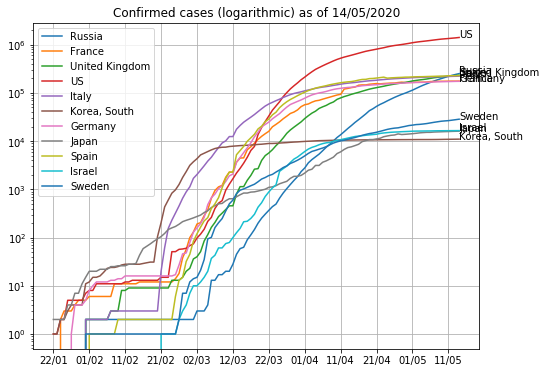

In [12]:
plt.figure(figsize = (8, 6))
#plt.title('Confirmed cases (logarithmic) as of ' + datetime.date.today().strftime("%d/%m/%Y"))
plt.title('Confirmed cases (logarithmic) as of ' + dates[-1] + '/2020')
semilogy_world_confirmed('Russia')
semilogy_world_confirmed('France')
#semilogy_world_confirmed('Hubei, China')
semilogy_world_confirmed('United Kingdom')
semilogy_world_confirmed('US')
semilogy_world_confirmed('Italy')
semilogy_world_confirmed('Korea, South')
semilogy_world_confirmed('Germany')
semilogy_world_confirmed('Japan')
semilogy_world_confirmed('Spain')
semilogy_world_confirmed('Israel')
#semilogy_world_confirmed('Ukraine')
semilogy_world_confirmed('Sweden')
#semilogy_world_confirmed('Belarus')
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
pass

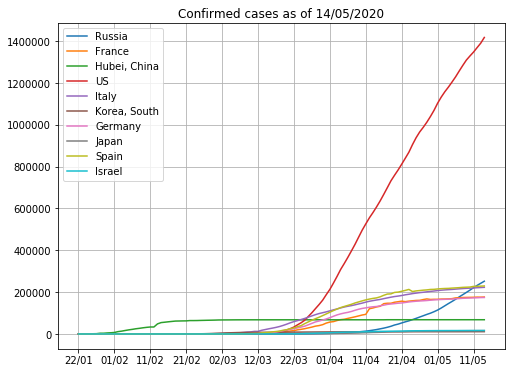

In [13]:
plt.figure(figsize = (8, 6))
#plt.title('Confirmed cases as of ' + datetime.date.today().strftime("%d/%m/%Y"))
plt.title('Confirmed cases as of ' + dates[-1] + '/2020')
plot_world_confirmed('Russia')
plot_world_confirmed('France')
plot_world_confirmed('Hubei, China')
plot_world_confirmed('US')
plot_world_confirmed('Italy')
plot_world_confirmed('Korea, South')
plot_world_confirmed('Germany')
plot_world_confirmed('Japan')
plot_world_confirmed('Spain')
plot_world_confirmed('Israel')
#plot_world_confirmed('Ukraine')
#plot_world_confirmed('Sweden')
#plot_world_confirmed('Belarus')
plt.grid()
plt.legend()
#plt.ylim([0,400000])
plt.xticks(t[0::10], dates[0::10])
pass

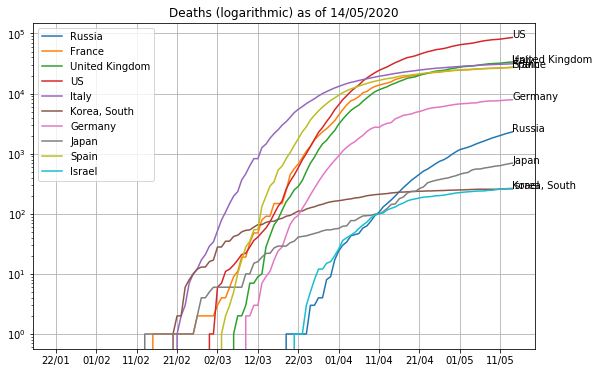

In [14]:
plt.figure(figsize = (9, 6))

#plt.title('Deaths (logarithmic) as of ' + datetime.date.today().strftime("%d/%m/%Y"))
plt.title('Deaths (logarithmic) as of ' + dates[-1] + '/2020')
semilogy_world_deaths('Russia')
semilogy_world_deaths('France')
#semilogy_world_deaths('Hubei, China')
semilogy_world_deaths('United Kingdom')
semilogy_world_deaths('US')
semilogy_world_deaths('Italy')
semilogy_world_deaths('Korea, South')
semilogy_world_deaths('Germany')
semilogy_world_deaths('Japan')
semilogy_world_deaths('Spain')
semilogy_world_deaths('Israel')
#semilogy_world_deaths('Ukraine')
#semilogy_world_deaths('Sweden')
#semilogy_world_deaths('Belarus')
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
pass

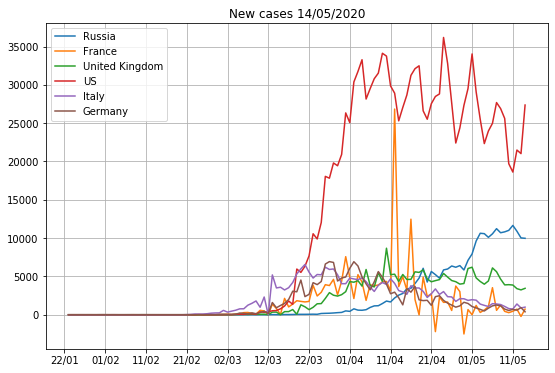

In [15]:
plt.figure(figsize = (9, 6))
plt.title('New cases ' + dates[-1] + '/2020')
plot_world_confirmed_diff('Russia')
plot_world_confirmed_diff('France')
#plot_world_confirmed_diff('Hubei, China')
plot_world_confirmed_diff('United Kingdom')
plot_world_confirmed_diff('US')
plot_world_confirmed_diff('Italy')
#plot_world_confirmed_diff('Korea, South')
plot_world_confirmed_diff('Germany')
#plot_world_confirmed_diff('Japan')
#plot_world_confirmed_diff('Spain')
#plot_world_confirmed_diff('Israel')
#semilogy_world_deaths('Ukraine')
#plot_world_confirmed_diff('Sweden')
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
pass

In [16]:
world_confirmed_diff.loc[world_worst,:].iloc[:,-15:]

,30/04,01/05,02/05,03/05,04/05,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
US,29515.0,34037.0,29078.0,25501.0,22335.0,23976.0,24980.0,27692.0,26906.0,25621.0,19710.0,18621.0,21495.0,21030.0,27368.0
Russia,7099.0,7933.0,9623.0,10633.0,10581.0,10102.0,10559.0,11231.0,10699.0,10817.0,11012.0,11656.0,10899.0,10028.0,9974.0
United Kingdom,6032.0,6201.0,4806.0,4339.0,3985.0,4406.0,6111.0,5614.0,4649.0,3896.0,3923.0,3877.0,3403.0,3242.0,3446.0
Spain,518.0,1781.0,1366.0,884.0,545.0,1318.0,996.0,1122.0,1410.0,721.0,772.0,3086.0,594.0,661.0,849.0
Italy,1872.0,1965.0,1900.0,1389.0,1221.0,1075.0,1444.0,1401.0,1327.0,1083.0,802.0,744.0,1402.0,888.0,992.0
Brazil,7502.0,5015.0,4898.0,4726.0,6794.0,6835.0,11156.0,9162.0,11121.0,9167.0,6638.0,6895.0,8620.0,11923.0,13028.0
France,671.0,0.0,1212.0,296.0,614.0,1049.0,3530.0,575.0,1278.0,440.0,269.0,452.0,728.0,-226.0,731.0
Germany,1470.0,1068.0,890.0,697.0,488.0,855.0,1155.0,1268.0,1158.0,736.0,555.0,697.0,595.0,927.0,380.0
Turkey,2615.0,2188.0,1983.0,1670.0,1614.0,1832.0,2253.0,1977.0,1848.0,1546.0,1542.0,1114.0,1704.0,1639.0,1635.0
Iran,983.0,1006.0,802.0,976.0,1223.0,1323.0,1680.0,1485.0,1556.0,1529.0,1383.0,1683.0,1481.0,1958.0,1808.0


In [17]:
world_confirmed_diff_percent_mean5.loc[world_worst,:].iloc[:,-10:]

,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
US,0.023474,0.021369,0.020640,0.020427,0.020556,0.019540,0.018239,0.016972,0.015806,0.015754
Russia,0.072740,0.071602,0.068767,0.064368,0.060689,0.058189,0.055994,0.052701,0.049589,0.046608
United Kingdom,0.025614,0.024703,0.024861,0.024609,0.024047,0.023108,0.020506,0.018080,0.016504,0.015840
Spain,0.005431,0.004680,0.004432,0.004885,0.005030,0.004516,0.006326,0.005833,0.005146,0.005241
Italy,0.007190,0.006642,0.006125,0.006028,0.005868,0.005591,0.004922,0.004891,0.004469,0.004366
Brazil,0.054599,0.061343,0.064751,0.070610,0.069848,0.066168,0.056677,0.052854,0.050254,0.051331
France,0.003779,0.007873,0.007085,0.008198,0.007970,0.007035,0.003457,0.003619,0.001896,0.002219
Germany,0.004834,0.004905,0.005323,0.005839,0.006111,0.005733,0.005167,0.004358,0.004065,0.003641
Turkey,0.014772,0.014617,0.014385,0.014462,0.014188,0.013583,0.011756,0.011208,0.010773,0.010777
Iran,0.010897,0.012098,0.013315,0.014284,0.014683,0.014607,0.014382,0.014176,0.014678,0.014956


In [18]:
world_confirmed_diff_percent_mean10.loc[world_worst,:].iloc[:,-10:]

,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
US,2.466201e-02,2.383302e-02,2.376804e-02,2.345544e-02,0.022784,0.021507,0.019804,0.018806,0.018117,0.018155
Russia,7.073470e-02,6.924023e-02,6.846758e-02,6.731038e-02,0.066879,0.065464,0.063798,0.060734,0.056978,0.053649
United Kingdom,2.693823e-02,2.705695e-02,2.703079e-02,2.675055e-02,0.026093,0.024361,0.022605,0.021470,0.020557,0.019944
Spain,6.292742e-03,5.912086e-03,5.544622e-03,5.556742e-03,0.004872,0.004974,0.005503,0.005133,0.005015,0.005135
Italy,8.616067e-03,8.113728e-03,7.890711e-03,7.464019e-03,0.006936,0.006391,0.005782,0.005508,0.005248,0.005117
Brazil,6.433095e-02,6.715804e-02,6.746239e-02,6.712847e-02,0.064908,0.060384,0.059010,0.058803,0.060432,0.060590
France,5.190768e-03,6.892512e-03,4.951263e-03,3.884937e-03,0.005658,0.005407,0.005665,0.005352,0.005047,0.005095
Germany,6.466493e-03,6.356602e-03,6.482662e-03,6.439844e-03,0.005862,0.005283,0.005036,0.004840,0.004952,0.004876
Turkey,1.818312e-02,1.775306e-02,1.733325e-02,1.661010e-02,0.015241,0.014177,0.013187,0.012797,0.012617,0.012482
Iran,1.119142e-02,1.156984e-02,1.192631e-02,1.221152e-02,0.012505,0.012752,0.013240,0.013746,0.014481,0.014820


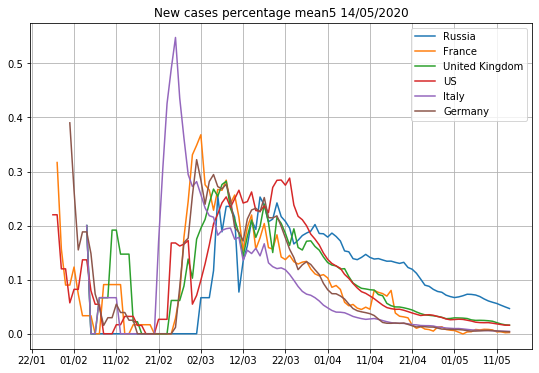

In [19]:
plt.figure(figsize = (9, 6))
plt.title('New cases percentage mean5 ' + dates[-1] + '/2020')
plot_world_confirmed_diff_percent_mean5('Russia')
plot_world_confirmed_diff_percent_mean5('France')
#plot_world_confirmed_diff_percent_mean5('Hubei, China')
plot_world_confirmed_diff_percent_mean5('United Kingdom')
plot_world_confirmed_diff_percent_mean5('US')
plot_world_confirmed_diff_percent_mean5('Italy')
#plot_world_confirmed_diff_percent_mean5('Korea, South')
plot_world_confirmed_diff_percent_mean5('Germany')
#plot_world_confirmed_diff_percent_mean5('Japan')
#plot_world_confirmed_diff_percent_mean5('Spain')
#plot_world_confirmed_diff_percent_mean5('Israel')
#semilogy_world_deaths('Ukraine')
#plot_world_confirmed_diff_percent_mean5('Sweden')
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
pass

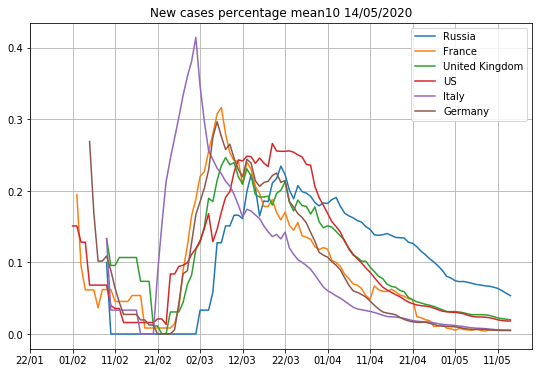

In [20]:
plt.figure(figsize = (9, 6))
plt.title('New cases percentage mean10 ' + dates[-1] + '/2020')
plot_world_confirmed_diff_percent_mean10('Russia')
plot_world_confirmed_diff_percent_mean10('France')
#plot_world_confirmed_diff_percent_mean10('Hubei, China')
plot_world_confirmed_diff_percent_mean10('United Kingdom')
plot_world_confirmed_diff_percent_mean10('US')
plot_world_confirmed_diff_percent_mean10('Italy')
#plot_world_confirmed_diff_percent_mean10('Korea, South')
plot_world_confirmed_diff_percent_mean10('Germany')
#plot_world_confirmed_diff_percent_mean10('Japan')
#plot_world_confirmed_diff_percent_mean10('Spain')
#plot_world_confirmed_diff_percent_mean10('Israel')
#semilogy_world_deaths('Ukraine')
#plot_world_confirmed_diff_percent_mean10('Sweden')
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
pass


In [21]:
world_confirmed_diff_relation = world_confirmed_diff.div(world_confirmed_diff.shift(10, axis='columns'))
world_confirmed_diff_relation_mean5  = world_confirmed_diff_relation.rolling(window=5,  axis='columns').mean()
world_confirmed_diff_relation_mean10 = world_confirmed_diff_relation.rolling(window=10, axis='columns').mean()

In [22]:
world_confirmed_diff_relation_mean5.loc[world_worst,:].iloc[:,-10:]

,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
US,0.897973,0.831593,0.874554,0.918257,0.982333,0.969679,0.898284,0.799010,0.743268,0.800822
Russia,1.794695,1.845475,1.840311,1.728627,1.737203,1.708792,1.670661,1.534774,1.389624,1.207769
United Kingdom,1.020992,1.006492,1.051112,1.094442,1.137634,1.088346,0.939539,0.820582,0.737335,0.719116
Spain,0.272356,0.297799,0.355477,0.532929,0.611050,0.818690,1.050026,1.014439,0.948391,1.192693
Italy,0.533809,0.514069,0.562436,0.584372,0.607373,0.601839,0.553296,0.539748,0.540685,0.599339
Brazil,1.614014,1.775537,1.831371,1.994689,1.939831,1.857945,1.542030,1.472381,1.592740,1.692007
France,0.118699,1.390771,1.531385,1.590516,1.479211,1.432699,NaN,NaN,NaN,NaN
Germany,0.471070,0.480616,0.661776,0.806283,0.844563,0.807128,0.753881,0.630909,0.696213,0.761477
Turkey,0.562195,0.658467,0.715373,0.762699,0.764617,0.754485,0.665138,0.651452,0.693225,0.790514
Iran,0.921731,1.058018,1.223377,1.313718,1.389296,1.437346,1.480525,1.550154,1.671527,1.682199


## Russia regions

In [23]:
url = "https://raw.githubusercontent.com/grwlf/COVID-19_plus_Russia/master/csse_covid_19_data/csse_covid_19_time_series/"
Russia_confirmed_raw = pd.read_csv(url + "time_series_covid19_confirmed_RU.csv")
Russia_confirmed_raw.to_csv('time_series_covid19_confirmed_RU_'+datetime.date.today().strftime("%d.%m.%Y")+'.csv') 
   # сохраним локально
Russia_deaths_raw = pd.read_csv(url + "time_series_covid19_deaths_RU.csv")
Russia_deaths_raw.to_csv('time_series_covid19_deaths_RU_'+datetime.date.today().strftime("%d.%m.%Y")+'.csv') 
   # сохраним локально
dates = Russia_confirmed_raw.columns[11:]
dates = np.array([datetime.datetime.strptime(x, '%m/%d/%y').strftime('%d/%m') for x in dates])
T = len(dates)
t = np.arange(T)

In [24]:
Russia_confirmed = Russia_confirmed_raw.iloc[:,11:]
Russia_confirmed.index = np.array(Russia_confirmed_raw['Province_State'])
Russia_confirmed.columns = dates

Russia_deaths = Russia_deaths_raw.iloc[:,11:]
Russia_deaths.index = np.array(Russia_deaths_raw['Province_State'])
Russia_deaths.columns = dates

In [25]:
Russia_confirmed_diff = Russia_confirmed.diff(axis = 'columns')
Russia_confirmed_diff_percent = Russia_confirmed_diff/Russia_confirmed
Russia_confirmed_diff_percent_mean5  = Russia_confirmed_diff_percent.rolling(window=5,  axis='columns').mean()
Russia_confirmed_diff_percent_mean10 = Russia_confirmed_diff_percent.rolling(window=10, axis='columns').mean()

In [26]:
def plot_Russia_confirmed(province='Nizhegorodskaya oblast'):

    y = np.array(Russia_confirmed.loc[province,:], dtype=float)
    plt.plot(y, label = province)
    
def semilogy_Russia_confirmed(province='Nizhegorodskaya oblast'):

    y = np.array(Russia_confirmed.loc[province,:], dtype=float)
    plt.semilogy(y, label = province)

def plot_Russia_deaths(province='Nizhegorodskaya oblast'):

    y = np.array(Russia_deaths.loc[province,:], dtype=float)
    plt.plot(y, label = province)
    
def semilogy_Russia_deaths(province='Nizhegorodskaya oblast'):

    y = np.array(Russia_deaths.loc[province,:], dtype=float)
    plt.semilogy(y, label = province)    
    
def plot_Russia_confirmed_diff(province='Nizhegorodskaya oblast'):
    plt.plot(Russia_confirmed_diff.loc[province,:], label = province)
    
def semilogy_Russia_confirmed_diff(province='Nizhegorodskaya oblast'):
    plt.semilogy(Russia_confirmed_diff.loc[province,:], label = province)

def plot_Russia_confirmed_diff_percent(province='Nizhegorodskaya oblast'):
    plt.plot(Russia_confirmed_diff_percent.loc[province,:], label = province)
    
def semilogy_Russia_confirmed_diff_percent(province='Nizhegorodskaya oblast'):
    plt.semilogy(Russia_confirmed_diff_percent.loc[province,:], label = province)

def plot_Russia_confirmed_diff_percent_mean5(province='Nizhegorodskaya oblast'):
    plt.plot(Russia_confirmed_diff_percent_mean5.loc[province,:], label = province)
    
def semilogy_Russia_confirmed_diff_percent_mean5(province='Nizhegorodskaya oblast'):
    plt.semilogy(Russia_confirmed_diff_percent_mean5.loc[province,:], label = province)

def plot_Russia_confirmed_diff_percent_mean10(province='Nizhegorodskaya oblast'):
    plt.plot(Russia_confirmed_diff_percent_mean10.loc[province,:], label = province)
    
def semilogy_Russia_confirmed_diff_percent_mean10(province='Nizhegorodskaya oblast'):
    plt.semilogy(Russia_confirmed_diff_percent_mean10.loc[province,:], label = province)


In [27]:
Russia_worst = Russia_confirmed.iloc[:,-1].nlargest(10).index
Russia_confirmed.loc[Russia_worst,:].iloc[:,-15:]

,30/04,01/05,02/05,03/05,04/05,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
Moscow,53739,57300,62658,68606,74401,80115,85973,92676,98522,104189,109740,115909,121301,126004,130716
Moscow oblast,11710,12507,13314,14136,14939,15761,16590,17432,18350,19425,20558,21637,22700,23662,24580
Saint Petersburg,4062,4411,4734,5029,5346,5572,5884,6190,6565,6990,7404,7711,8050,8485,8945
Nizhegorodskaya oblast,1944,2123,2443,2695,2852,3026,3298,3610,3886,4180,4442,4733,5087,5358,5596
Republic of Dagestan,1389,1553,1662,1798,1958,2086,2267,2372,2468,2560,2653,2772,2888,2997,3095
Murmansk oblast,1227,1313,1456,1694,1974,2101,2237,2272,2322,2340,2371,2416,2428,2471,2492
Sverdlov oblast,703,935,1016,1091,1144,1277,1353,1429,1584,1705,1844,1952,2163,2298,2362
Krasnodarskiy kray,1017,1083,1162,1244,1340,1437,1534,1633,1732,1830,1929,2027,2126,2222,2319
Tula oblast,965,1047,1135,1218,1293,1368,1445,1530,1620,1706,1795,1881,1971,2060,2158
Kaluga oblast,885,1006,1065,1136,1217,1309,1407,1486,1564,1641,1730,1828,1924,2018,2115


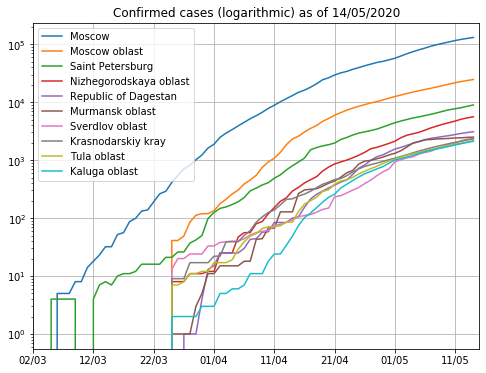

In [28]:
plt.figure(figsize = (8, 6))
plt.title('Confirmed cases (logarithmic) as of ' + dates[-1] + '/2020')
for province in Russia_worst:
    semilogy_Russia_confirmed(province)
#semilogy_world_confirmed('Russia')
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
plt.xlim(40, len(dates))
pass

In [29]:
Russia_deaths.loc[Russia_worst,:].iloc[:,-15:]

,30/04,01/05,02/05,03/05,04/05,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
Moscow,611,658,695,729,764,816,866,905,956,1010,1068,1124,1179,1232,1290
Moscow oblast,93,109,109,111,111,127,141,156,175,186,195,209,219,226,240
Saint Petersburg,29,33,33,34,37,37,40,44,48,53,53,56,58,63,69
Nizhegorodskaya oblast,12,14,14,16,16,16,16,23,23,26,29,31,32,35,37
Republic of Dagestan,12,12,12,13,13,14,15,16,17,18,18,20,23,26,26
Murmansk oblast,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6
Sverdlov oblast,1,1,1,1,1,1,3,3,3,3,3,3,3,3,4
Krasnodarskiy kray,20,20,20,20,21,21,21,21,21,21,22,22,22,22,24
Tula oblast,7,7,7,8,8,9,9,10,11,12,12,12,14,14,16
Kaluga oblast,12,12,12,12,12,12,12,13,13,14,15,15,15,19,19


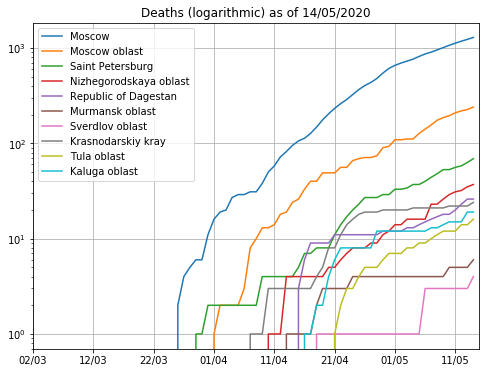

In [30]:
plt.figure(figsize = (8, 6))
plt.title('Deaths (logarithmic) as of ' + dates[-1] + '/2020')
for province in Russia_worst:
    semilogy_Russia_deaths(province)
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
plt.xlim(40, len(dates))

pass

In [31]:
Russia_confirmed_diff.loc[Russia_worst,:].iloc[:,-15:]

,30/04,01/05,02/05,03/05,04/05,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
Moscow,3093.0,3561.0,5358.0,5948.0,5795.0,5714.0,5858.0,6703.0,5846.0,5667.0,5551.0,6169.0,5392.0,4703.0,4712.0
Moscow oblast,793.0,797.0,807.0,822.0,803.0,822.0,829.0,842.0,918.0,1075.0,1133.0,1079.0,1063.0,962.0,918.0
Saint Petersburg,336.0,349.0,323.0,295.0,317.0,226.0,312.0,306.0,375.0,425.0,414.0,307.0,339.0,435.0,460.0
Nizhegorodskaya oblast,150.0,179.0,320.0,252.0,157.0,174.0,272.0,312.0,276.0,294.0,262.0,291.0,354.0,271.0,238.0
Republic of Dagestan,158.0,164.0,109.0,136.0,160.0,128.0,181.0,105.0,96.0,92.0,93.0,119.0,116.0,109.0,98.0
Murmansk oblast,101.0,86.0,143.0,238.0,280.0,127.0,136.0,35.0,50.0,18.0,31.0,45.0,12.0,43.0,21.0
Sverdlov oblast,74.0,232.0,81.0,75.0,53.0,133.0,76.0,76.0,155.0,121.0,139.0,108.0,211.0,135.0,64.0
Krasnodarskiy kray,66.0,66.0,79.0,82.0,96.0,97.0,97.0,99.0,99.0,98.0,99.0,98.0,99.0,96.0,97.0
Tula oblast,92.0,82.0,88.0,83.0,75.0,75.0,77.0,85.0,90.0,86.0,89.0,86.0,90.0,89.0,98.0
Kaluga oblast,113.0,121.0,59.0,71.0,81.0,92.0,98.0,79.0,78.0,77.0,89.0,98.0,96.0,94.0,97.0


In [32]:
Russia_confirmed_diff_percent.loc[Russia_worst,:].iloc[:,-10:]

,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
Moscow,0.071322,0.068138,0.072327,0.059337,0.054392,0.050583,0.053223,0.044451,0.037324,0.036048
Moscow oblast,0.052154,0.049970,0.048302,0.050027,0.055341,0.055112,0.049868,0.046828,0.040656,0.037347
Saint Petersburg,0.040560,0.053025,0.049435,0.057121,0.060801,0.055916,0.039813,0.042112,0.051267,0.051425
Nizhegorodskaya oblast,0.057502,0.082474,0.086427,0.071024,0.070335,0.058982,0.061483,0.069589,0.050579,0.042530
Republic of Dagestan,0.061361,0.079841,0.044266,0.038898,0.035937,0.035055,0.042929,0.040166,0.036370,0.031664
Murmansk oblast,0.060447,0.060796,0.015405,0.021533,0.007692,0.013075,0.018626,0.004942,0.017402,0.008427
Sverdlov oblast,0.104150,0.056171,0.053184,0.097854,0.070968,0.075380,0.055328,0.097550,0.058747,0.027096
Krasnodarskiy kray,0.067502,0.063233,0.060625,0.057159,0.053552,0.051322,0.048347,0.046566,0.043204,0.041828
Tula oblast,0.054825,0.053287,0.055556,0.055556,0.050410,0.049582,0.045720,0.045662,0.043204,0.045412
Kaluga oblast,0.070283,0.069652,0.053163,0.049872,0.046923,0.051445,0.053611,0.049896,0.046581,0.045863


In [33]:
Russia_confirmed_diff_percent_mean5.loc[Russia_worst,:].iloc[:,-10:]

,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
Moscow,0.076714,0.077912,0.075275,0.069803,0.065103,0.060955,0.057972,0.052397,0.047995,0.044326
Moscow oblast,0.057679,0.054928,0.052465,0.050841,0.051159,0.051751,0.051730,0.051435,0.049561,0.045962
Saint Petersburg,0.061173,0.055954,0.052195,0.051887,0.052188,0.055260,0.052617,0.051153,0.049982,0.048107
Nizhegorodskaya oblast,0.084272,0.083904,0.074992,0.070495,0.073552,0.073848,0.069650,0.066283,0.062194,0.056633
Republic of Dagestan,0.077981,0.072828,0.068565,0.061217,0.052061,0.046800,0.039417,0.038597,0.038091,0.037237
Murmansk oblast,0.101300,0.100359,0.083798,0.060005,0.033175,0.023700,0.015266,0.013174,0.012347,0.012494
Sverdlov oblast,0.109415,0.071024,0.065716,0.071538,0.076465,0.070711,0.070543,0.079416,0.071594,0.062820
Krasnodarskiy kray,0.066798,0.067256,0.065784,0.064032,0.060414,0.057178,0.054201,0.051389,0.048598,0.046254
Tula oblast,0.067365,0.062359,0.057963,0.055446,0.053927,0.052878,0.051365,0.049386,0.046916,0.045916
Kaluga oblast,0.075003,0.064878,0.064431,0.061905,0.057978,0.054211,0.051003,0.050349,0.049691,0.049479


In [34]:
Russia_confirmed_diff_percent_mean10.loc[Russia_worst,:].iloc[:,-10:]

,05/05,06/05,07/05,08/05,09/05,10/05,11/05,12/05,13/05,14/05
Moscow,0.068170,0.067990,0.068892,0.068476,0.069532,0.068834,0.067942,0.063836,0.058899,0.054715
Moscow oblast,0.059929,0.058576,0.056834,0.056725,0.055975,0.054715,0.053329,0.051950,0.050201,0.048561
Saint Petersburg,0.062284,0.062679,0.062650,0.062600,0.060897,0.058216,0.054286,0.051674,0.050935,0.050148
Nizhegorodskaya oblast,0.086849,0.083904,0.079396,0.081147,0.080878,0.079060,0.076777,0.070637,0.066344,0.065093
Republic of Dagestan,0.099784,0.095313,0.082939,0.073490,0.070260,0.062390,0.056123,0.053581,0.049654,0.044649
Murmansk oblast,0.085200,0.080354,0.079063,0.074872,0.069424,0.062500,0.057813,0.048486,0.036176,0.022835
Sverdlov oblast,0.122991,0.113925,0.106248,0.100263,0.093052,0.090063,0.070783,0.072566,0.071566,0.069643
Krasnodarskiy kray,0.068425,0.065390,0.064642,0.064615,0.063345,0.061988,0.060728,0.058586,0.056315,0.053334
Tula oblast,0.082391,0.077472,0.073350,0.069965,0.064697,0.060122,0.056862,0.053675,0.051181,0.049921
Kaluga oblast,0.089080,0.084038,0.080591,0.076088,0.072231,0.064607,0.057940,0.057390,0.055798,0.053729


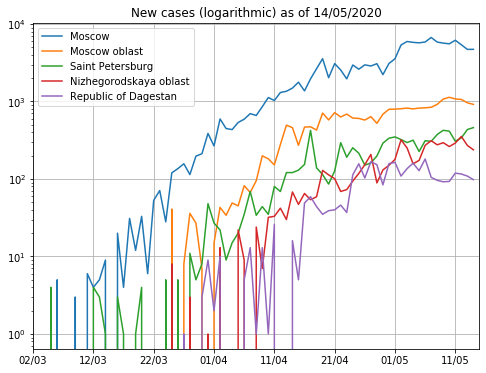

In [35]:
plt.figure(figsize = (8, 6))
plt.title('New cases (logarithmic) as of ' + dates[-1] + '/2020')
for province in Russia_worst[:5]:
    semilogy_Russia_confirmed_diff(province)
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
plt.xlim(40, len(dates))
pass

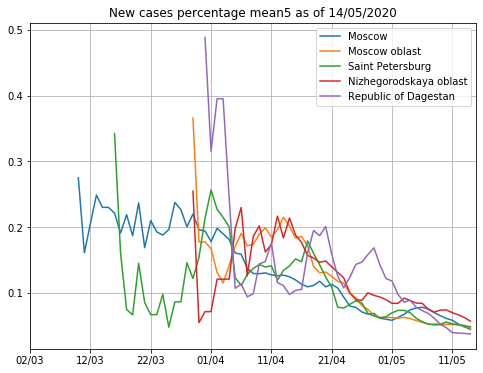

In [36]:
plt.figure(figsize = (8, 6))
plt.title('New cases percentage mean5 as of ' + dates[-1] + '/2020')
for province in Russia_worst[:-5]:
    plot_Russia_confirmed_diff_percent_mean5(province)
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
plt.xlim(40, len(dates))
pass

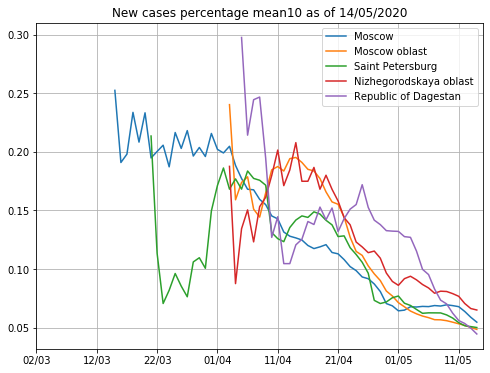

In [37]:
plt.figure(figsize = (8, 6))
plt.title('New cases percentage mean10 as of ' + dates[-1] + '/2020')
for province in Russia_worst[:5]:
    plot_Russia_confirmed_diff_percent_mean10(province)
plt.grid()
plt.legend()
plt.xticks(t[0::10], dates[0::10])
plt.xlim(40, len(dates))
pass